# divide to groups by kmean and find the best model for each group:


In [67]:
from pycaret.classification import *


In [68]:
import pandas as pd
import numpy as np
dataset=pd.read_excel("C:/Users/97254/Downloads/patient_level__ver 12_proj1_sn_5-13.xlsx", engine='openpyxl')
print(dataset.shape)

(1020, 70)


In [69]:
dataset.head()

,ser_num,ICU_LOS,LOS_Group,ICU_mortality,HOSP_mortality,28_mortality,90 days mortality,trauma,metabolic,gastrointestinal,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,2,9,LOS_8-13,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,3,5,LOS_5-7,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,5,13,LOS_8-13,0,0,0,0,0,0,1,...,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,7,6,LOS_5-7,0,0,0,0,0,1,1,...,0.0,0.000000,0.0,0.0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,9,9,LOS_8-13,0,0,0,0,1,1,1,...,0.0,0.000000,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529


# preproccesing

In [70]:
dataset.isnull().sum()

ser_num           0
ICU_LOS           0
LOS_Group         0
ICU_mortality     0
HOSP_mortality    0
                 ..
EN_pro_day1/kg    0
EN_pro_day2/kg    0
EN_pro_day3/kg    0
EN_pro_day4/kg    0
EN_pro_day5/kg    0
Length: 70, dtype: int64

In [71]:
dataset[dataset['age']=='NAN'].shape

(44, 70)

In [72]:
dataset = dataset[~dataset['age'].isin(['NAN'])]

In [73]:
dataset.shape

(976, 70)


# K mean

In [130]:
X = dataset[[
'EN_pro_day0/kg'   
,'EN_pro_day1/kg'    
,'EN_pro_day2/kg'      
,'EN_pro_day3/kg'    
,'EN_pro_day4/kg'       
,'EN_pro_day5/kg'        
    
]]

In [131]:
from pycaret.clustering import *
exp_clu101 = setup(X, 
                   session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(976, 6)"
2,Missing Values,False
3,Numeric Features,6
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(976, 6)"
9,CPU Jobs,-1


Text(0, 0.5, 'Inertia')

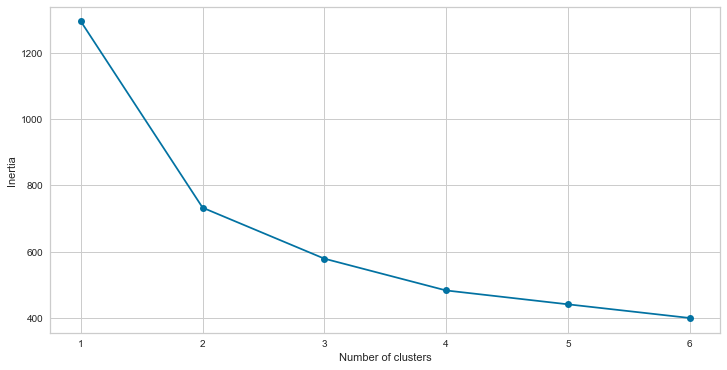

In [76]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,7):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,7), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [132]:
kmeans = create_model('kmeans',num_clusters=3)
kmean_results = assign_model(kmeans)
#num_clusters is set to 4

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3047,602.2193,1.2385,0,0,0


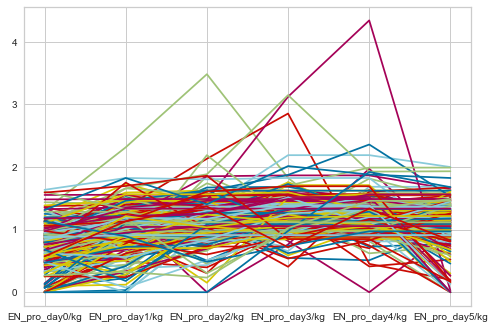

In [134]:
class1=kmean_results[kmean_results.Cluster=='Cluster 1']
class1_nocl=class1.iloc[:,:6]#no indexes
for index, row in class1_nocl.iterrows():
    row.plot.line()

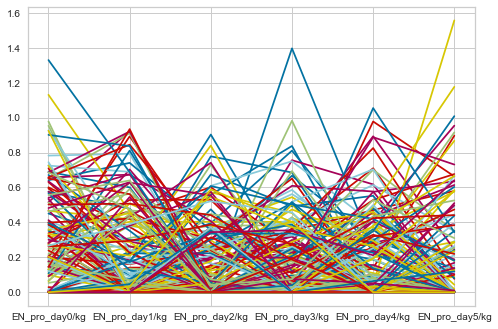

In [78]:
class2=kmean_results[kmean_results.Cluster=='Cluster 2']
class1_noc2=class2.iloc[:,:6]
for index, row in class1_noc2.iterrows():
    row.plot.line()

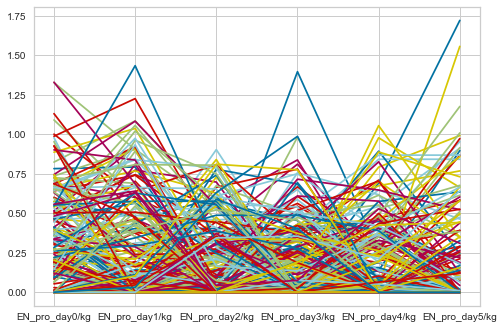

In [136]:
class0=kmean_results[kmean_results.Cluster=='Cluster 0']
class1_noc0=class0.iloc[:,:6]
for index, row in class1_noc0.iterrows():
    row.plot.line()

# run rf on every cluster:

In [137]:
np.array(class0.index)

array([   2,    7,    9,   12,   15,   18,   33,   37,   43,   46,   59,
         62,   66,   67,   71,   75,   76,   81,   83,   85,   90,   93,
         94,   99,  100,  105,  107,  108,  109,  111,  113,  114,  115,
        117,  123,  125,  129,  130,  135,  139,  142,  145,  147,  148,
        150,  156,  162,  164,  167,  169,  174,  175,  177,  178,  180,
        183,  186,  195,  198,  199,  201,  203,  204,  209,  212,  216,
        219,  225,  226,  230,  234,  240,  244,  246,  247,  248,  250,
        251,  254,  261,  265,  271,  273,  281,  283,  289,  291,  292,
        295,  296,  299,  301,  302,  304,  308,  311,  312,  317,  318,
        321,  322,  323,  326,  328,  330,  345,  350,  354,  355,  360,
        367,  369,  375,  376,  377,  380,  382,  383,  386,  391,  393,
        394,  395,  397,  398,  403,  407,  408,  411,  412,  413,  421,
        423,  425,  429,  431,  432,  433,  439,  442,  447,  448,  449,
        451,  453,  459,  460,  462,  466,  472,  4

In [138]:
a0=dataset.iloc[[    2,    7,    9,   12,   15,   18,   33,   37,   43,   46,   59,
         62,   66,   67,   71,   75,   76,   81,   83,   85,   90,   93,
         94,   99,  100,  105,  107,  108,  109,  111,  113,  114,  115,
        117,  123,  125,  129,  130,  135,  139,  142,  145,  147,  148,
        150,  156,  162,  164,  167,  169,  174,  175,  177,  178,  180,
        183,  186,  195,  198,  199,  201,  203,  204,  209,  212,  216,
        219,  225,  226,  230,  234,  240,  244,  246,  247,  248,  250,
        251,  254,  261,  265,  271,  273,  281,  283,  289,  291,  292,
        295,  296,  299,  301,  302,  304,  308,  311,  312,  317,  318,
        321,  322,  323,  326,  328,  330,  345,  350,  354,  355,  360,
        367,  369,  375,  376,  377,  380,  382,  383,  386,  391,  393,
        394,  395,  397,  398,  403,  407,  408,  411,  412,  413,  421,
        423,  425,  429,  431,  432,  433,  439,  442,  447,  448,  449,
        451,  453,  459,  460,  462,  466,  472,  477,  486,  488,  489,
        492,  498,  501,  502,  504,  506,  510,  512,  522,  523,  524,
        528,  529,  533,  534,  539,  540,  554,  559,  561,  562,  565,
        567,  571,  572,  580,  581,  583,  585,  586,  588,  593,  596,
        599,  600,  601,  608,  620,  621,  622,  623,  624,  629,  630,
        632,  633,  634,  641,  643,  644,  647,  649,  650,  661,  664,
        666,  668,  669,  670,  673,  676,  678,  679,  690,  694,  695,
        696,  697,  698,  705,  710,  712,  713,  714,  721,  727,  729,
        735,  736,  739,  744,  745,  750,  751,  755,  758,  760,  765,
        777,  778,  779,  780,  781,  782,  785,  787,  791,  797,  798,
        799,  801,  802,  803,  806,  807,  809,  810,  815,  816,  818,
        820,  824,  826,  827,  829,  831,  832,  836,  840,  844,  848,
        851,  856,  858,  859,  865,  866,  869,  871,  873,  875,  882,
        885,  886,  887,  892,  907,  908,  911,  912,  918,  924,  925,
        926,  934,  943,  946,


]]

In [139]:
a0 = a0[[
'LOS_Group',
'ICU_mortality',
'trauma',
'metabolic',
'gastrointestinal',
'Sepsis'
,'age'
,'gender'
,'weight'
,'BMI'
,'active problems'
,'background problems'
,'feeding'
,'Target_pro_day'
,'pro_to_target_day0'
,'pro_to_target_day1'
,'pro_to_target_day2'
,'pro_to_target_day3'
,'pro_to_target_day4'
,'pro_to_target_day5'
,'pro_to_target_day6'
,'pro_to_target_day7'
,'pro_to_target_day8'
,'pro_to_target_day9'
,'pro_to_target_day10'
,'pro_to_target_day11'
,'pro_to_target_day12'
,'pro_to_target_day13'
,'Total_EN_pro'
,'Total_PN_pro'
,'EN_pro_day0'
,'PN_pro_day0'
,'EN_pro_day1'
,'PN_pro_day1'
,'EN_pro_day2'
,'PN_pro_day2'
,'EN_pro_day3'
,'PN_pro_day3'
,'EN_pro_day4'
,'PN_pro_day4'
,'EN_pro_day5'
,'PN_pro_day5'
,'EN_pro_day6'
,'PN_pro_day6'
,'EN_pro_day7'
,'PN_pro_day7'
,'EN_pro_day8'
,'PN_pro_day8'
,'EN_pro_day9'
,'PN_pro_day9'
,'EN_pro_day10'
,'PN_pro_day10'
,'EN_pro_day11'
,'PN_pro_day11'
,'EN_pro_day12'
,'PN_pro_day12'
,'EN_pro_day13'
,'PN_pro_day13'  
,'EN_pro_day0/kg'   
,'EN_pro_day1/kg'    
,'EN_pro_day2/kg'      
,'EN_pro_day3/kg'    
,'EN_pro_day4/kg'       
,'EN_pro_day5/kg'        
    
]]


In [140]:
a0.head()

,LOS_Group,ICU_mortality,trauma,metabolic,gastrointestinal,Sepsis,age,gender,weight,BMI,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
2,LOS_8-13,0,0,0,1,1,44,M,70.0,22.857143,...,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
7,LOS_8-13,1,0,1,1,1,82,M,75.0,29.296875,...,0.0,0.000000,0.0,0.0,0.598987,0.000000,0.000000,0.000000,0.000000,0.000000
9,LOS_8-13,1,0,1,1,1,55,M,70.0,27.343750,...,0.0,0.000000,0.0,0.0,0.600495,0.374210,0.098057,0.350786,0.709757,0.076419
12,LOS_5-7,0,1,1,0,1,39,F,45.0,18.730489,...,0.0,0.000000,0.0,0.0,0.515885,0.922515,0.000000,0.000000,0.000000,0.000000
15,LOS_8-13,0,0,0,1,0,43,M,60.0,20.281233,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.030656,0.129511,0.025833,0.088178


In [141]:
a0.ICU_mortality.value_counts()


0    231
1     70
Name: ICU_mortality, dtype: int64

In [142]:
from pycaret.classification import *

#dataset = dataset.sample(frac=0.38, random_state=120)
#data_unseen = dataset.drop(data.index)


model_setup = setup(data=a0, target='ICU_mortality', data_split_stratify = True,pca = True, pca_components =40)

,Description,Value
0,session_id,8022
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(301, 64)"
5,Missing Values,False
6,Numeric Features,52
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [143]:
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7571,0.5950,0.1000,0.4000,0.1571,0.0773,0.1111,0.0680
et,Extra Trees Classifier,0.7571,0.5882,0.0000,0.0000,0.0000,-0.0172,-0.0250,0.0590
qda,Quadratic Discriminant Analysis,0.7429,0.4059,0.0000,0.0000,0.0000,-0.0390,-0.0478,0.0140
knn,K Neighbors Classifier,0.7381,0.6158,0.1400,0.2533,0.1771,0.0690,0.0707,0.0100
nb,Naive Bayes,0.7381,0.6490,0.2600,0.4150,0.3001,0.1544,0.1682,0.0060
lda,Linear Discriminant Analysis,0.7286,0.6094,0.1850,0.3583,0.2321,0.0986,0.1123,0.0060
lightgbm,Light Gradient Boosting Machine,0.7286,0.5736,0.0600,0.1500,0.0857,-0.0136,-0.0248,0.0230
ridge,Ridge Classifier,0.7238,0.0000,0.1450,0.3167,0.1872,0.0594,0.0718,0.0060
gbc,Gradient Boosting Classifier,0.7238,0.5122,0.1000,0.2417,0.1341,0.0149,0.0183,0.0640
lr,Logistic Regression,0.7143,0.5926,0.2050,0.3067,0.2375,0.0846,0.0845,0.0760


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8022, verbose=0,
                       warm_start=False)


In [146]:
#for more info: https://pycaret.org/tune-model/
model = create_model("svm")
tuned_rf = tune_model(model, optimize = 'recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7619,0.5147,0.0000,0.0000,0.0000,-0.0825,-0.1085
1,0.9048,0.7750,0.6000,1.0000,0.7500,0.6957,0.7303
2,0.6190,0.3625,0.0000,0.0000,0.0000,-0.2174,-0.2282
3,0.6190,0.5625,0.0000,0.0000,0.0000,-0.2174,-0.2282
4,0.6667,0.7375,0.2000,0.2500,0.2222,0.0134,0.0136
5,0.7143,0.7000,0.2000,0.3333,0.2500,0.0870,0.0913
6,0.7619,0.8250,0.6000,0.5000,0.5455,0.3860,0.3889
7,0.8095,0.5750,0.4000,0.6667,0.5000,0.3913,0.4108
8,0.8095,0.6125,0.2000,1.0000,0.3333,0.2759,0.4000
9,0.7143,0.8250,0.4000,0.4000,0.4000,0.2125,0.2125


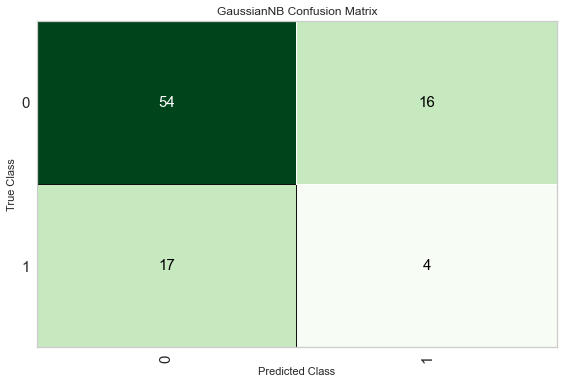

In [147]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [148]:
#select indexes from this cluster
np.array(class1.index)

array([   0,    3,    4,    6,   10,   20,   30,   32,   36,   45,   48,
         52,   55,   58,   65,   69,   72,   73,   74,   77,   82,   86,
         88,   91,   92,   96,  103,  110,  118,  121,  132,  134,  140,
        144,  149,  158,  161,  165,  172,  173,  176,  181,  182,  188,
        191,  197,  200,  205,  207,  208,  217,  221,  222,  223,  227,
        231,  233,  235,  238,  259,  260,  262,  276,  278,  284,  285,
        298,  300,  313,  314,  320,  329,  331,  335,  338,  340,  343,
        362,  363,  372,  389,  390,  392,  399,  400,  402,  404,  406,
        409,  410,  416,  419,  426,  428,  430,  434,  436,  438,  440,
        452,  458,  461,  463,  468,  471,  474,  479,  481,  483,  490,
        494,  511,  513,  516,  521,  527,  531,  536,  538,  543,  544,
        546,  547,  548,  555,  558,  574,  584,  592,  594,  598,  611,
        614,  617,  618,  631,  646,  654,  656,  659,  660,  665,  672,
        677,  682,  683,  684,  685,  688,  692,  7

In [149]:
a1=dataset.iloc[[    0,    3,    4,    6,   10,   20,   30,   32,   36,   45,   48,
         52,   55,   58,   65,   69,   72,   73,   74,   77,   82,   86,
         88,   91,   92,   96,  103,  110,  118,  121,  132,  134,  140,
        144,  149,  158,  161,  165,  172,  173,  176,  181,  182,  188,
        191,  197,  200,  205,  207,  208,  217,  221,  222,  223,  227,
        231,  233,  235,  238,  259,  260,  262,  276,  278,  284,  285,
        298,  300,  313,  314,  320,  329,  331,  335,  338,  340,  343,
        362,  363,  372,  389,  390,  392,  399,  400,  402,  404,  406,
        409,  410,  416,  419,  426,  428,  430,  434,  436,  438,  440,
        452,  458,  461,  463,  468,  471,  474,  479,  481,  483,  490,
        494,  511,  513,  516,  521,  527,  531,  536,  538,  543,  544,
        546,  547,  548,  555,  558,  574,  584,  592,  594,  598,  611,
        614,  617,  618,  631,  646,  654,  656,  659,  660,  665,  672,
        677,  682,  683,  684,  685,  688,  692,  700,  704,  707,  708,
        709,  711,  717,  718,  720,  722,  723,  724,  725,  746,  749,
        756,  759,  767,  770,  775,  792,  793,  794,  795,  804,  805,
        813,  817,  821,  822,  825,  835,  837,  838,  839,  846,  853,
        855,  861,  863,  868,  870,  880,  890,  898,  902,  905,  913,
        914,  916,  920,  927,  930,  936,  939,  949,  957,  959,  961,
        974,

]]

In [150]:
a1 = a1[[
'LOS_Group',
'ICU_mortality',
'trauma',
'metabolic',
'gastrointestinal',
'Sepsis'
,'age'
,'gender'
,'weight'
,'BMI'
,'active problems'
,'background problems'
,'feeding'
,'Target_pro_day'
,'pro_to_target_day0'
,'pro_to_target_day1'
,'pro_to_target_day2'
,'pro_to_target_day3'
,'pro_to_target_day4'
,'pro_to_target_day5'
,'pro_to_target_day6'
,'pro_to_target_day7'
,'pro_to_target_day8'
,'pro_to_target_day9'
,'pro_to_target_day10'
,'pro_to_target_day11'
,'pro_to_target_day12'
,'pro_to_target_day13'
,'Total_EN_pro'
,'Total_PN_pro'
,'EN_pro_day0'
,'PN_pro_day0'
,'EN_pro_day1'
,'PN_pro_day1'
,'EN_pro_day2'
,'PN_pro_day2'
,'EN_pro_day3'
,'PN_pro_day3'
,'EN_pro_day4'
,'PN_pro_day4'
,'EN_pro_day5'
,'PN_pro_day5'
,'EN_pro_day6'
,'PN_pro_day6'
,'EN_pro_day7'
,'PN_pro_day7'
,'EN_pro_day8'
,'PN_pro_day8'
,'EN_pro_day9'
,'PN_pro_day9'
,'EN_pro_day10'
,'PN_pro_day10'
,'EN_pro_day11'
,'PN_pro_day11'
,'EN_pro_day12'
,'PN_pro_day12'
,'EN_pro_day13'
,'PN_pro_day13'  
,'EN_pro_day0/kg'   
,'EN_pro_day1/kg'    
,'EN_pro_day2/kg'      
,'EN_pro_day3/kg'    
,'EN_pro_day4/kg'       
,'EN_pro_day5/kg'        
    
]]


In [151]:
a1.ICU_mortality.value_counts()


0    151
1     59
Name: ICU_mortality, dtype: int64

In [107]:
a1.head()

,LOS_Group,ICU_mortality,trauma,metabolic,gastrointestinal,Sepsis,age,gender,weight,BMI,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,LOS_8-13,0,0,1,0,1,72,F,65.0,23.875115,...,0.0,0.0,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
3,LOS_5-7,0,0,1,1,0,71,F,48.0,19.227688,...,0.0,0.0,0.0,0.0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
6,LOS_8-13,0,0,0,1,0,64,F,75.0,24.489796,...,0.0,0.0,0.0,0.0,0.115471,1.116262,1.190400,1.186267,1.632667,1.172213
9,LOS_8-13,1,0,1,1,1,55,M,70.0,27.343750,...,0.0,0.0,0.0,0.0,0.600495,0.374210,0.098057,0.350786,0.709757,0.076419
27,LOS_8-13,1,0,0,1,1,65,M,80.0,26.122449,...,0.0,0.0,0.0,0.0,0.317717,0.488033,0.334400,0.792000,0.792000,0.792000


In [152]:
from pycaret.classification import *

#dataset = dataset.sample(frac=0.38, random_state=120)
#data_unseen = dataset.drop(data.index)


model_setup = setup(data=a1, target='ICU_mortality', data_split_stratify = True,normalize = True,pca = True, pca_components =40)

,Description,Value
0,session_id,6706
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(210, 64)"
5,Missing Values,False
6,Numeric Features,51
7,Categorical Features,12
8,Ordinal Features,False
9,High Cardinality Features,False


In [153]:
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.7190,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0170
et,Extra Trees Classifier,0.7057,0.4279,0.0000,0.0000,0.0000,-0.0239,-0.0322,0.0570
rf,Random Forest Classifier,0.6919,0.4317,0.0250,0.0333,0.0286,-0.0290,-0.0377,0.0680
knn,K Neighbors Classifier,0.6657,0.4915,0.1850,0.3333,0.2269,0.0425,0.0475,0.0100
lightgbm,Light Gradient Boosting Machine,0.6652,0.3854,0.0450,0.1000,0.0619,-0.0534,-0.0594,0.0120
gbc,Gradient Boosting Classifier,0.6443,0.4354,0.0450,0.1167,0.0533,-0.0865,-0.0960,0.0450
nb,Naive Bayes,0.6224,0.5357,0.3400,0.3662,0.3320,0.0790,0.0868,0.0060
lda,Linear Discriminant Analysis,0.6114,0.4866,0.2250,0.2000,0.2019,-0.0182,-0.0260,0.0120
lr,Logistic Regression,0.6038,0.5145,0.1200,0.1167,0.1086,-0.1037,-0.1229,0.0200
ridge,Ridge Classifier,0.5971,0.0000,0.1000,0.1000,0.0933,-0.1135,-0.1235,0.0160


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


In [154]:
#for more info: https://pycaret.org/tune-model/
model = create_model("nb")
tuned_rf = tune_model(model, optimize = 'recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.2667,0.1818,0.0000,0.0000,0.0000,-0.5138,-0.5641
1,0.6667,0.5000,0.2500,0.3333,0.2857,0.0741,0.0754
2,0.6000,0.6818,0.2500,0.2500,0.2500,-0.0227,-0.0227
3,0.6667,0.7045,0.7500,0.4286,0.5455,0.3119,0.3425
4,0.6667,0.7955,0.2500,0.3333,0.2857,0.0741,0.0754
5,0.8000,0.7600,0.6000,0.7500,0.6667,0.5263,0.5330
6,0.5000,0.4500,0.7500,0.3333,0.4615,0.1091,0.1414
7,0.3571,0.4500,0.2500,0.1429,0.1818,-0.2857,-0.3162
8,0.5000,0.3250,0.2500,0.2000,0.2222,-0.1395,-0.1414
9,0.4286,0.5000,0.2500,0.1667,0.2000,-0.2174,-0.2282


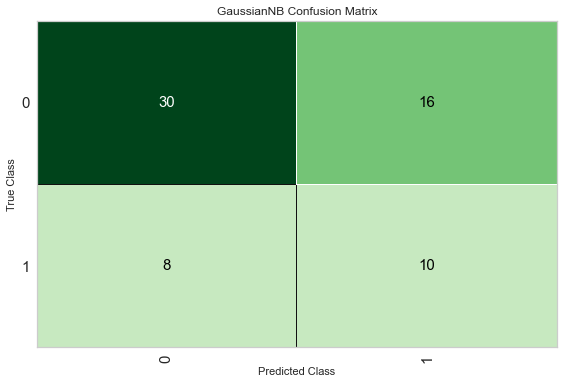

In [155]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [156]:
np.array(class2.index)

array([   2,    7,    9,   12,   15,   18,   33,   43,   46,   59,   62,
         66,   67,   71,   75,   76,   85,   90,   93,   94,   99,  100,
        105,  107,  108,  109,  111,  113,  114,  115,  117,  123,  129,
        130,  135,  139,  142,  145,  147,  148,  150,  156,  162,  167,
        169,  174,  175,  180,  186,  195,  198,  199,  201,  203,  204,
        209,  212,  216,  219,  225,  226,  230,  234,  240,  244,  246,
        247,  248,  250,  251,  254,  261,  265,  271,  281,  283,  289,
        292,  295,  296,  299,  301,  302,  304,  308,  311,  312,  318,
        321,  322,  323,  326,  328,  330,  350,  354,  355,  360,  367,
        369,  375,  376,  377,  380,  382,  383,  386,  391,  393,  394,
        397,  398,  403,  407,  408,  411,  412,  413,  423,  425,  429,
        431,  432,  433,  439,  442,  448,  449,  451,  453,  459,  460,
        462,  466,  472,  477,  486,  488,  489,  492,  498,  501,  504,
        506,  510,  512,  522,  523,  524,  528,  5

In [116]:
a2=dataset.iloc[[    2,    7,    9,   12,   15,   18,   33,   43,   46,   59,   62,
         66,   67,   71,   75,   76,   85,   90,   93,   94,   99,  100,
        105,  107,  108,  109,  111,  113,  114,  115,  117,  123,  129,
        130,  135,  139,  142,  145,  147,  148,  150,  156,  162,  167,
        169,  174,  175,  180,  186,  195,  198,  199,  201,  203,  204,
        209,  212,  216,  219,  225,  226,  230,  234,  240,  244,  246,
        247,  248,  250,  251,  254,  261,  265,  271,  281,  283,  289,
        292,  295,  296,  299,  301,  302,  304,  308,  311,  312,  318,
        321,  322,  323,  326,  328,  330,  350,  354,  355,  360,  367,
        369,  375,  376,  377,  380,  382,  383,  386,  391,  393,  394,
        397,  398,  403,  407,  408,  411,  412,  413,  423,  425,  429,
        431,  432,  433,  439,  442,  448,  449,  451,  453,  459,  460,
        462,  466,  472,  477,  486,  488,  489,  492,  498,  501,  504,
        506,  510,  512,  522,  523,  524,  528,  529,  533,  534,  554,
        561,  562,  565,  567,  571,  580,  581,  583,  585,  588,  593,
        596,  599,  601,  608,  621,  622,  624,  629,  630,  632,  633,
        634,  641,  643,  647,  649,  650,  661,  664,  666,  668,  669,
        670,  673,  678,  679,  694,  695,  696,  697,  698,  705,  710,
        712,  713,  714,  721,  727,  729,  735,  736,  739,  744,  745,
        750,  751,  755,  758,  760,  765,  777,  778,  779,  781,  782,
        785,  791,  797,  798,  799,  801,  802,  803,  806,  807,  809,
        810,  815,  816,  818,  824,  826,  827,  829,  831,  832,  840,
        844,  848,  851,  856,  858,  859,  865,  866,  873,  875,  882,
        885,  886,  887,  907,  908,  911,  912,  918,  924,  925,  926,
        934,  943,  960, 

]]

In [162]:
a2 = a2[[
'LOS_Group',
'ICU_mortality',
'trauma',
'metabolic',
'gastrointestinal',
'Sepsis'
,'age'
,'gender'
,'weight'
,'BMI'
,'active problems'
,'background problems'
,'feeding'
,'Target_pro_day'
,'pro_to_target_day0'
,'pro_to_target_day1'
,'pro_to_target_day2'
,'pro_to_target_day3'
,'pro_to_target_day4'
,'pro_to_target_day5'
,'pro_to_target_day6'
,'pro_to_target_day7'
,'pro_to_target_day8'
,'pro_to_target_day9'
,'pro_to_target_day10'
,'pro_to_target_day11'
,'pro_to_target_day12'
,'pro_to_target_day13'
,'Total_EN_pro'
,'Total_PN_pro'
,'EN_pro_day0'
,'PN_pro_day0'
,'EN_pro_day1'
,'PN_pro_day1'
,'EN_pro_day2'
,'PN_pro_day2'
,'EN_pro_day3'
,'PN_pro_day3'
,'EN_pro_day4'
,'PN_pro_day4'
,'EN_pro_day5'
,'PN_pro_day5'
,'EN_pro_day6'
,'PN_pro_day6'
,'EN_pro_day7'
,'PN_pro_day7'
,'EN_pro_day8'
,'PN_pro_day8'
,'EN_pro_day9'
,'PN_pro_day9'
,'EN_pro_day10'
,'PN_pro_day10'
,'EN_pro_day11'
,'PN_pro_day11'
,'EN_pro_day12'
,'PN_pro_day12'
,'EN_pro_day13'
,'PN_pro_day13'  
,'EN_pro_day0/kg'   
,'EN_pro_day1/kg'    
,'EN_pro_day2/kg'      
,'EN_pro_day3/kg'    
,'EN_pro_day4/kg'       
,'EN_pro_day5/kg'        
    
]]


In [163]:
from pycaret.classification import *



model_setup = setup(data=a2, target='ICU_mortality', data_split_stratify = True)

,Description,Value
0,session_id,4237
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(265, 64)"
5,Missing Values,False
6,Numeric Features,53
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [164]:
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7632,0.6824,0.1400,0.4000,0.2038,0.1179,0.1433,0.0620
knn,K Neighbors Classifier,0.7518,0.5449,0.0950,0.2333,0.1317,0.0560,0.0606,0.0100
rf,Random Forest Classifier,0.7468,0.6280,0.0950,0.3000,0.1400,0.0525,0.0727,0.0660
ada,Ada Boost Classifier,0.7409,0.6921,0.3200,0.4150,0.3504,0.1971,0.2032,0.0310
gbc,Gradient Boosting Classifier,0.7199,0.6004,0.1950,0.2667,0.2190,0.0752,0.0739,0.0450
lr,Logistic Regression,0.7184,0.6030,0.2400,0.3667,0.2667,0.1100,0.1228,0.0730
ridge,Ridge Classifier,0.7181,0.0000,0.3100,0.3933,0.3393,0.1703,0.1724,0.0070
lightgbm,Light Gradient Boosting Machine,0.7137,0.5771,0.1700,0.2417,0.1976,0.0493,0.0409,0.0220
lda,Linear Discriminant Analysis,0.6974,0.6120,0.2850,0.3683,0.3111,0.1236,0.1301,0.0100
dt,Decision Tree Classifier,0.6871,0.5612,0.3200,0.2633,0.2867,0.0996,0.0951,0.0060


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=4237, verbose=0,
                     warm_start=False)


In [169]:
#for more info: https://pycaret.org/tune-model/
model = create_model("nb")
tuned_rf = tune_model(model, optimize = 'recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4211,0.8500,1.0000,0.2667,0.4211,0.1328,0.2667
1,0.3684,0.9333,1.0000,0.2500,0.4000,0.0952,0.2236
2,0.3158,0.4000,0.4000,0.1667,0.2353,-0.2167,-0.2869
3,0.5263,0.7786,1.0000,0.3571,0.5263,0.2262,0.3571
4,0.4211,0.7929,1.0000,0.3125,0.4762,0.1255,0.2588
5,0.2778,0.3929,1.0000,0.2353,0.3810,0.0331,0.1296
6,0.6111,0.8750,1.0000,0.3636,0.5333,0.3077,0.4264
7,0.5000,0.6429,0.7500,0.2727,0.4000,0.1099,0.1523
8,0.2222,0.5446,0.7500,0.1875,0.3000,-0.0862,-0.2362
9,0.3333,0.8036,1.0000,0.2500,0.4000,0.0690,0.1890


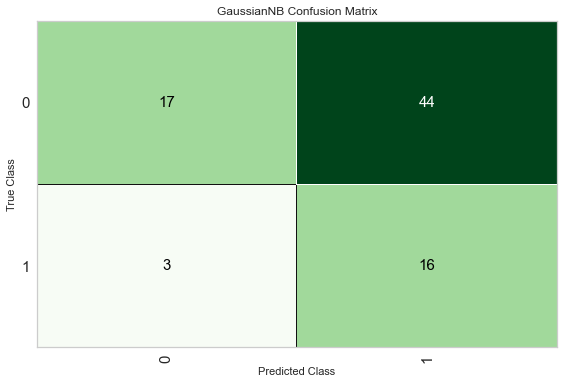

In [170]:
plot_model(tuned_rf, plot = 'confusion_matrix')